In [ ]:
#import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# **IMPORTING DATASETS**

In [ ]:
#Declare variable and get data from "Orders Dataset"
sheet_url = 'https://docs.google.com/spreadsheets/d/1sIYmukCDZHQNfnL7FNFD59viohjcIFgwJBcqQYVhiBw/export?format=xlsx&gid=486292335'
df_orders = pd.read_excel(sheet_url)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
df_orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [ ]:
#Declare variable and get data from "Customers Dataset"
sheet_url2 = 'https://docs.google.com/spreadsheets/d/12rhKoMy0RUtRw8Alw01rfxjWbb1apHK0_Tb96heoTdo/export?format=xlsx&gid=794509385' 
df_customers = pd.read_excel(sheet_url2)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [ ]:
#Declare variable and get data from "Order Payments Dataset"
sheet_url3 = 'https://docs.google.com/spreadsheets/d/1buIXTPFYh3Y5_J_GcY3_mUKtZh5VrukCETFqBD0xFdg/export?format=xlsx&gid=2029050229'
df_payments = pd.read_excel(sheet_url3)
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


# **DATA CLEANING**

In [ ]:
#Removing Irrelevant Values
#Orders_Dataset :  order_purchase_timestamp, order_delivered_carrier_date, order_estimated_delivery date
#Customers_Dataset: none
#Payments_Dataset: none

df_orders.drop(columns=['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_estimated_delivery_date'], inplace = True)
df_orders.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-16 18:17:02


In [ ]:
#Handling missing data
#Checking Null value in orders dataset
pd.isnull(df_orders).sum()

order_id                            0
customer_id                         0
order_status                        0
order_approved_at                 160
order_delivered_customer_date    2965
dtype: int64

In [ ]:
#Drop all Null values in orders dataset
df_orders = df_orders.dropna()
pd.isnull(df_orders).sum()

order_id                         0
customer_id                      0
order_status                     0
order_approved_at                0
order_delivered_customer_date    0
dtype: int64

In [ ]:
#Checking Null value in customers dataset
pd.isnull(df_customers).sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#Checking Null value in payments dataset
pd.isnull(df_payments).sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
#Remove duplicates value
df_orders.drop_duplicates(inplace=True)
df_customers.drop_duplicates(inplace=True)
df_payments.drop_duplicates(inplace=True)

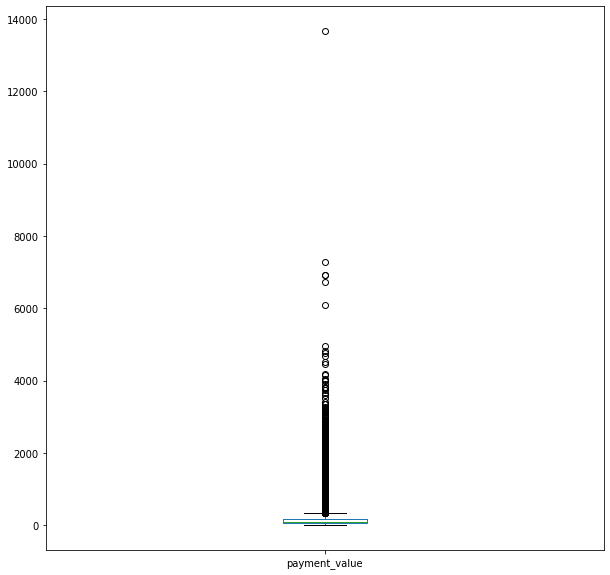

In [ ]:
#Handling outlier for payments dataset
df_payments.boxplot(column='payment_value', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
#Calculate IQR Stats (Payments Dataset)

c_q1 = df_payments['payment_value'].quantile(0.25)
c_q3 = df_payments['payment_value'].quantile(0.75)
c_iqr = c_q3 - c_q1
boxplot_c_min = c_q1 - 1.5 * c_iqr
boxplot_c_max = c_q3 + 1.5 * c_iqr
print('Q1: ', c_q1)
print('Q3: ', c_q3)
print('IQR: ', c_iqr)
print('Min: ', boxplot_c_min)
print('Max: ', boxplot_c_max)

Q1:  56.79
Q3:  171.8375
IQR:  115.04750000000001
Min:  -115.78125000000003
Max:  344.40875000000005


In [ ]:
#Exclude outlier using IQR formula
df_payments = df_payments[(df_payments['payment_value'] >= boxplot_c_min) & (df_payments['payment_value'] < boxplot_c_max)]

In [ ]:
#Combine datasets into single dataset
df = pd.merge (df_orders, df_customers, on = 'customer_id')
df.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
df_ecommerce = pd.merge (df, df_payments, on = 'order_id')
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93107 entries, 0 to 93106
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93107 non-null  object        
 1   customer_id                    93107 non-null  object        
 2   order_status                   93107 non-null  object        
 3   order_approved_at              93107 non-null  datetime64[ns]
 4   order_delivered_customer_date  93107 non-null  datetime64[ns]
 5   customer_unique_id             93107 non-null  object        
 6   customer_zip_code_prefix       93107 non-null  int64         
 7   customer_city                  93107 non-null  object        
 8   customer_state                 93107 non-null  object        
 9   payment_sequential             93107 non-null  int64         
 10  payment_type                   93107 non-null  object        
 11  payment_install

In [ ]:
#Handling Typos
df_ecommerce['customer_state'].unique()


array(['SP', 'BA', 'GO', 'RN', 'PR', 'RJ', 'RS', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'AP', 'MS', 'ES',
       'MA', 'AL', 'AC', 'AM', 'PI'], dtype=object)

In [ ]:
df_ecommerce['customer_state'].value_counts()
#there is no common code or single value code, assumed no typos in string value customer_state

SP    39707
RJ    11998
MG    10940
RS     5116
PR     4736
SC     3365
BA     3175
DF     1971
ES     1925
GO     1870
PE     1475
CE     1147
PA      841
MT      797
MS      655
MA      642
PB      454
RN      454
PI      436
AL      340
SE      295
TO      258
RO      215
AM      135
AC       67
AP       60
RR       33
Name: customer_state, dtype: int64

In [ ]:
#Time Manipulation using Timedelta
t = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_approved_at']
t

0        8 days 10:17:58
1        8 days 10:17:58
2        8 days 10:17:58
3       12 days 12:03:18
4        9 days 09:11:06
              ...       
93102   11 days 01:52:57
93103    8 days 05:13:56
93104   22 days 04:27:19
93105   24 days 20:20:01
93106    7 days 01:48:02
Length: 93107, dtype: timedelta64[ns]

In [ ]:
#Insert actual delivery time into dataset
df_ecommerce['actual_delivery_time'] = t
df_ecommerce = df_ecommerce.sort_values('actual_delivery_time', ascending=True) #checking if there is negative value to exclude
df_ecommerce

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time
29274,bc4854efd86d9f42140c951c595d20c1,30aef21b6dd78da1334dd1164cc0b05e,delivered,2017-09-13 22:00:51,2017-09-06 22:15:45,25d27a4142682b5d504dcc67caab8d6f,4909,sao paulo,SP,1,credit_card,2,142.92,-7 days +00:14:54
13622,1fab4ac9d85079b3da72a11475ae1685,f831c1fa80308975ec2b58e4877328e0,delivered,2017-09-13 22:06:11,2017-09-08 20:13:03,d121ceaccf4c241eae9a5f97cc661ccf,13610,leme,SP,1,credit_card,8,243.01,-6 days +22:06:52
79924,40de47dfa620d667117e4a6067b6e1ec,9f64391c68c234a7264087c2d0c1ac76,delivered,2017-09-13 21:58:38,2017-09-08 20:41:16,2d32acd3ec65cdd1da5ef425e03d0fda,38406,uberlandia,MG,1,credit_card,3,160.50,-6 days +22:42:38
85983,4387477eec4b3c89b39f3f454940d059,dbbbdb6ab9a7d8e3fc39a907f456bf19,delivered,2018-08-20 15:56:29,2018-08-15 14:56:43,c1dffa0ed8695e4823f90ae4550e336e,5412,sao paulo,SP,1,debit_card,1,222.02,-6 days +23:00:14
47432,e73fe43cdcd166f7f0c6e3c2bf11a917,3a412111e4f293539eae05b502fc63de,delivered,2018-08-20 15:57:28,2018-08-15 15:46:38,f7c20fc3dc5222bc4389740958175652,8220,sao paulo,SP,1,debit_card,1,56.50,-6 days +23:49:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76217,2fe324febf907e3ea3f2aa9650869fa5,65b14237885b3972ebec28c0f7dd2220,delivered,2017-03-13 20:17:10,2017-09-19 17:00:07,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,1,boleto,1,55.95,189 days 20:42:57
36150,0f4519c5f1c541ddec9f21b3bddd533a,1a8a4a30dc296976717f44e7801fdeef,delivered,2017-03-09 13:26:57,2017-09-19 14:38:21,4df2d7257a7463e2d7a98a5b08cb92fc,64013,teresina,PI,1,credit_card,4,259.15,194 days 01:11:24
57697,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-09 01:11:33,2017-09-19 15:12:50,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,1,credit_card,2,185.02,194 days 14:01:17
52113,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 15:16:14,2018-09-19 23:24:07,eb21169c3153a2b507fc7e76d561ff14,22723,rio de janeiro,RJ,1,credit_card,1,162.25,208 days 08:07:53


In [ ]:
#filtering actual delivery time data
df_ecommerce = df_ecommerce[df_ecommerce.actual_delivery_time >= pd.Timedelta(0)]
df_ecommerce

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time
24114,9bccdd3552c2a68af6d166dfd82be6ba,b4e1d5fdf13905222b7a571b9edad9ef,delivered,2018-04-24 18:05:57,2018-04-24 18:16:59,9eb5dbe2b5f217e8a10c5b7e14b90346,8290,sao paulo,SP,1,credit_card,1,107.46,0 days 00:11:02
3811,26449e55a87a5c565d60238999c380ff,3ebd7c64f990c7558321fb5af7a547b9,delivered,2018-04-24 18:55:14,2018-04-24 19:11:46,67e01e8409e5b0735a24e54759195613,12307,jacarei,SP,1,credit_card,1,91.17,0 days 00:16:32
92433,1378f9601350615613cc8832d6789c5d,988126b4ddf725d9724e4318872ea2ae,delivered,2017-09-13 22:03:51,2017-09-13 22:24:46,507dc9becd4fc65635d90682dfa9d3a3,98900,santa rosa,RS,1,credit_card,5,124.90,0 days 00:20:55
22090,fe857b5ac310b06adabd0e18af932cc5,3a5e6f873f45644fdfea652076839de0,delivered,2018-04-24 18:53:22,2018-04-24 19:17:28,a853fbe4c65c24952022a30655adb74f,18090,sorocaba,SP,1,credit_card,1,29.70,0 days 00:24:06
75783,339063a819f93e6e25102c3bb66ab667,73e1e70b645c6ef82dda64348a5c2391,delivered,2018-04-24 19:18:43,2018-04-24 19:51:47,b88d7e07a1508ee88d1ca350f201a2a1,8596,itaquaquecetuba,SP,1,credit_card,5,53.29,0 days 00:33:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76217,2fe324febf907e3ea3f2aa9650869fa5,65b14237885b3972ebec28c0f7dd2220,delivered,2017-03-13 20:17:10,2017-09-19 17:00:07,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,1,boleto,1,55.95,189 days 20:42:57
36150,0f4519c5f1c541ddec9f21b3bddd533a,1a8a4a30dc296976717f44e7801fdeef,delivered,2017-03-09 13:26:57,2017-09-19 14:38:21,4df2d7257a7463e2d7a98a5b08cb92fc,64013,teresina,PI,1,credit_card,4,259.15,194 days 01:11:24
57697,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-09 01:11:33,2017-09-19 15:12:50,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,1,credit_card,2,185.02,194 days 14:01:17
52113,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 15:16:14,2018-09-19 23:24:07,eb21169c3153a2b507fc7e76d561ff14,22723,rio de janeiro,RJ,1,credit_card,1,162.25,208 days 08:07:53


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
#Data Aggregation to get information which state has higher total spend with payment type 
grouped = df_ecommerce.groupby(['customer_state', 'payment_type']).agg({'payment_value' : 'sum'})
grouped = grouped.sort_values('payment_value', ascending=False)
grouped

,,payment_value
customer_state,payment_type,
SP,credit_card,3113771.64
RJ,credit_card,1084800.37
MG,credit_card,956922.61
SP,boleto,750680.10
RS,credit_card,425093.26
...,...,...
AC,voucher,239.43
AP,voucher,237.42
AM,voucher,210.82


In [ ]:
df_ecommerce.groupby(['customer_state', 'payment_type']).size()

customer_state  payment_type
AC              boleto            13
                credit_card       48
                debit_card         2
                voucher            4
AL              boleto            58
                                ... 
SP              voucher         2331
TO              boleto            68
                credit_card      163
                debit_card         3
                voucher           24
Length: 105, dtype: int64

In [ ]:
#Descriptive Statistics

df_ecommerce[['order_approved_at','order_delivered_customer_date','customer_zip_code_prefix', 'payment_sequential', 
              'payment_installments', 'payment_value', 'actual_delivery_time']].describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,actual_delivery_time
count,93043.000000,93043.000000,93043.000000,93043.000000,93043
mean,34767.216685,1.094816,2.629838,110.019749,12 days 00:30:21.575368367
std,29750.640082,0.678076,2.451626,72.679056,9 days 08:26:55.050311139
min,1003.000000,1.000000,0.000000,0.000000,0 days 00:11:02
25%,11065.000000,1.000000,1.000000,54.000000,6 days 06:28:11
50%,24220.000000,1.000000,1.000000,92.210000,9 days 18:37:38
75%,57920.000000,1.000000,3.000000,150.500000,15 days 00:21:46
max,99980.000000,26.000000,24.000000,344.340000,208 days 12:01:24


In [ ]:
df_ecommerce[['order_approved_at','order_delivered_customer_date']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,order_approved_at,order_delivered_customer_date
count,93043,93043
unique,81790,88208
top,2017-06-09 16:15:08,2017-06-22 16:04:46
freq,26,26
first,2016-10-04 09:43:32,2016-10-11 13:46:32
last,2018-08-29 15:10:26,2018-10-17 13:22:46


In [ ]:
df_ecommerce[['customer_city', 'customer_state', 'payment_type']].describe()

,customer_city,customer_state,payment_type
count,93043,93043,93043
unique,3965,27,4
top,sao paulo,SP,credit_card
freq,14715,39650,68295


# **DATA VISUALIZATION**

In [ ]:
#Visualize order per month
df_ecommerce['order_at_year_month'] = df_ecommerce['order_approved_at'].dt.strftime('%Y-%m')
grouped_ym=df_ecommerce.groupby('order_at_year_month').size().reset_index().rename(columns={0: 'order_id'})
grouped_ym = grouped_ym.sort_values('order_id', ascending=False)
grouped_ym

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_at_year_month,order_id
12,2017-11,6875
16,2018-03,6802
14,2018-01,6769
18,2018-05,6627
17,2018-04,6327
15,2018-02,6310
21,2018-08,6204
19,2018-06,5821
20,2018-07,5717
13,2017-12,5499


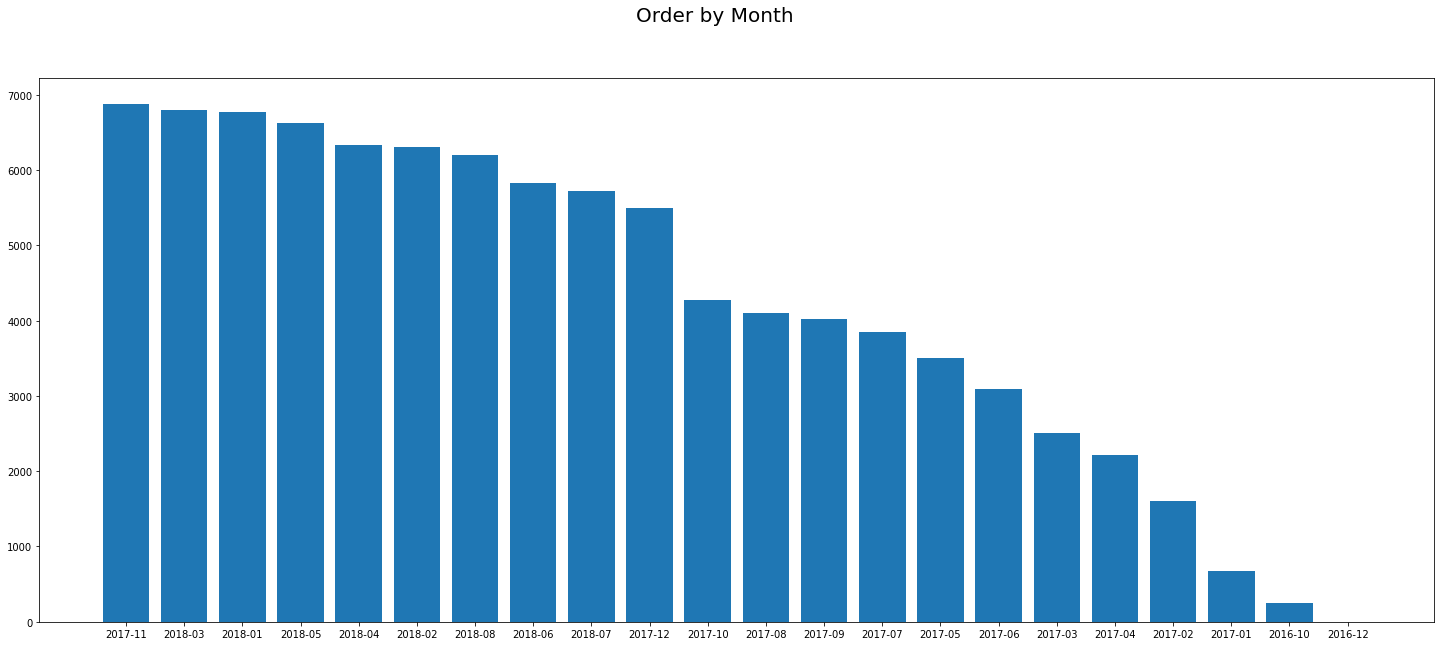

In [ ]:
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Order by Month', fontsize=20)
plt.bar(grouped_ym['order_at_year_month'], grouped_ym['order_id'])
plt.show()

In [ ]:
#Visualize Daily Order Trends
wday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_ecommerce['order_day'] = df_ecommerce['order_approved_at'].dt.strftime('%A') 
grouped_d=df_ecommerce.groupby('order_day').size().reset_index().rename(columns={0: 'order_id'})
grouped_d['order_day'] = pd.Categorical(grouped_d['order_day'], categories=wday, ordered=True)
grouped_d = grouped_d.sort_values('order_day')
grouped_d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_day,order_id
1,Monday,12252
5,Tuesday,17966
6,Wednesday,14804
4,Thursday,14467
0,Friday,13699
2,Saturday,11371
3,Sunday,8484


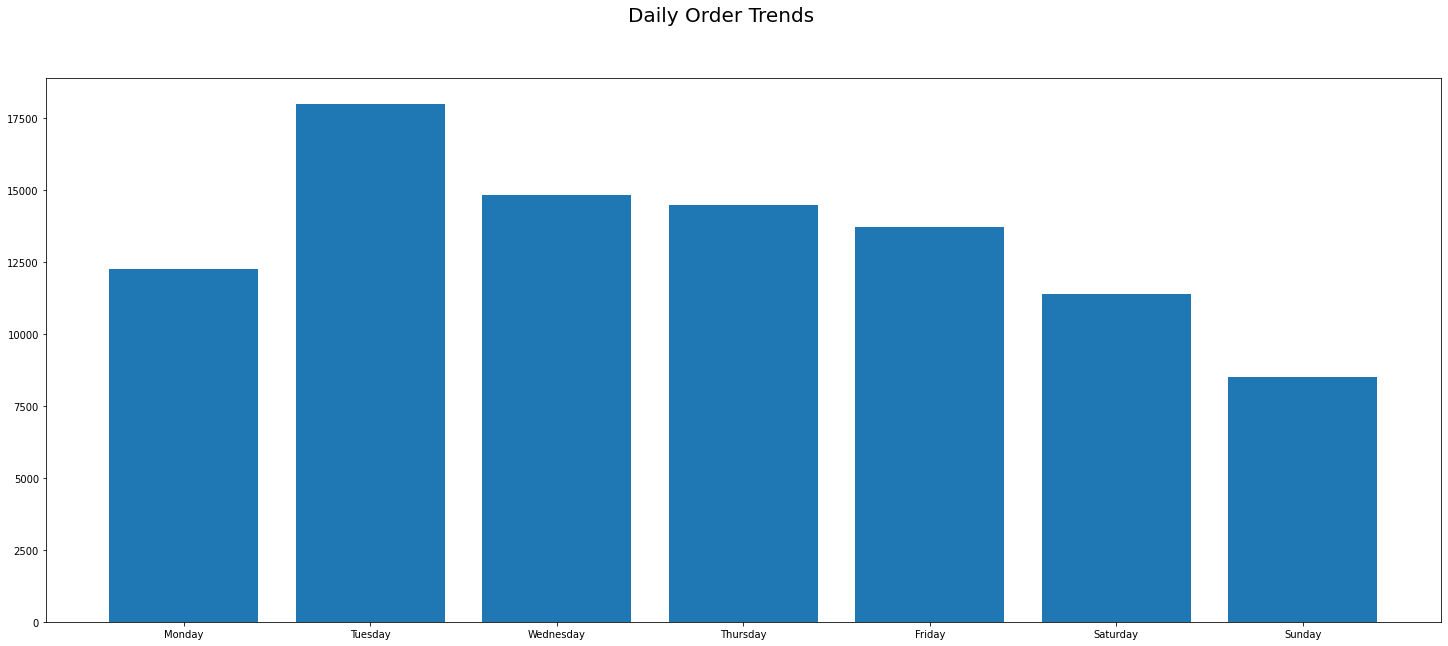

In [ ]:
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Daily Order Trends', fontsize=20)
plt.bar(grouped_d['order_day'], grouped_d['order_id'])
plt.show()

In [ ]:
 # Visualize Percentage of order per payment type
grouped_p=df_ecommerce.groupby('payment_type').size().reset_index().rename(columns={0: 'order_id'})
grouped_p['%'] = 100 * grouped_p['order_id'] / grouped_p['order_id'].sum()
grouped_p = grouped_p.sort_values('order_id', ascending=False)
grouped_p


,payment_type,order_id,%
1,credit_card,68295,73.401546
0,boleto,17932,19.272809
3,voucher,5417,5.822039
2,debit_card,1399,1.503606


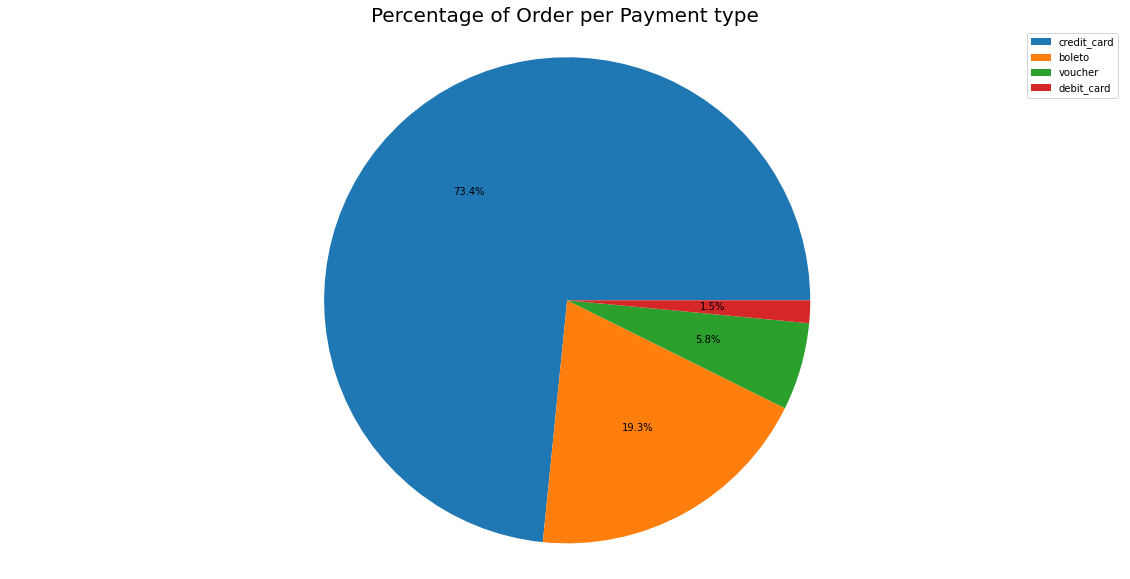

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.pie(grouped_p['%'], autopct= '%1.1f%%')
plt.title('Percentage of Order per Payment type', fontsize=20)
plt.axis('equal')
plt.legend(grouped_p['payment_type'])

plt.show() 

# **EDA using Pandas Profiling**

In [ ]:
#Installing Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #after installing pandas profiling, we need to restart runtime from beginning

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
#Descriptive statistics using pandas profiling 

profile = ProfileReport(df_ecommerce, title= 'Descriptive Statistics for E-Commerce Datasets', explorative = True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#save profiling descriptive analysis into html
profile.to_file(output_file='E-commerce.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]